In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
from sklearn.datasets import load_digits
from skimage.color import gray2rgb
from skimage.color import rgb2gray

In [10]:
digits = load_digits()

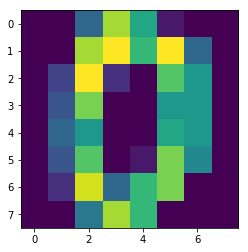

In [11]:
plt.imshow(digits.images[0])
plt.show()

In [74]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [13]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
digits.data.shape

(1797, 64)

In [16]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

In [23]:
digits.data.shape

(1797, 64)

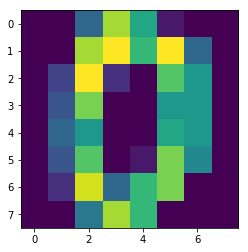

In [26]:
digits.images.reshape([digits.images.shape[0], 64])[0].reshape([8,8])

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    gray2rgb(digits.images), digits.target, test_size=0.2)

In [78]:
from sklearn.base import TransformerMixin

class ReshapeTransformer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        return rgb2gray(X).reshape([rgb2gray(X).shape[0], 64])

In [79]:
rsh = ReshapeTransformer()
pca = PCA(n_components=15)
nn = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 10, 5), random_state=42)

pipe = Pipeline([('TransImages', rsh), ('PCA', pca), ("NeuralNet", nn)])

In [80]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('TransImages', <__main__.ReshapeTransformer object at 0x7f2190d45d68>), ('PCA', PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('NeuralNet', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
...      solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))])

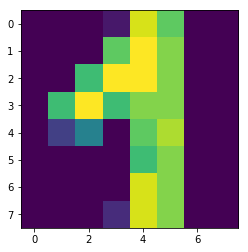

In [82]:
plt.imshow(rgb2gray(X_test[0]))

## LIME Image

In [105]:
from lime.lime_image import LimeImageExplainer
from skimage.segmentation import mark_boundaries

In [84]:
explainer = LimeImageExplainer()

In [88]:
pipe.predict_proba(X_test[0:1])

array([[1.33162774e-03, 5.71340606e-01, 1.70521772e-02, 2.50544359e-02,
        6.32114317e-04, 4.33775328e-02, 1.74423210e-05, 8.70883261e-02,
        1.91422161e-01, 6.26835762e-02]])

In [93]:
X_test[0:1].shape

(1, 8, 8, 3)

In [117]:
exp = explainer.explain_instance(X_test[2], pipe.predict_proba)

In [118]:
exp.top_labels

[5, 8, 3, 9, 1]

In [148]:
temp, mask = exp.get_image_and_mask(label=5, positive_only=False, hide_rest=False)

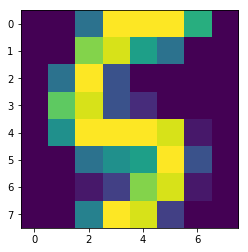

In [149]:
plt.imshow(rgb2gray(X_test[2]))

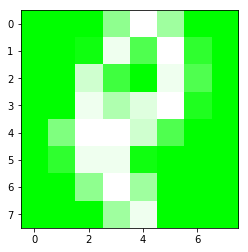

In [150]:
plt.imshow(mark_boundaries(temp / temp.max(), mask))

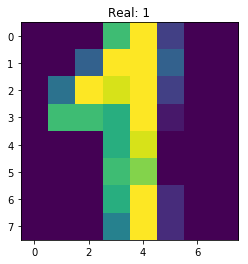

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


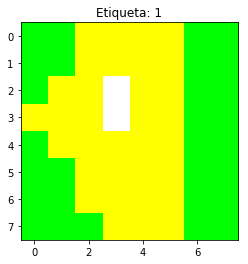

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


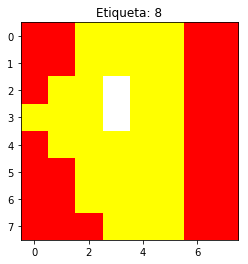

In [157]:
plt.imshow(rgb2gray(X_test[7]))
plt.title('Real: '+ str(y_test[7]))
plt.show()

exp = explainer.explain_instance(X_test[7], pipe.predict_proba)
temp, mask = exp.get_image_and_mask(label=exp.top_labels[0], positive_only=False, hide_rest=False)
plt.imshow(mark_boundaries(temp *0.1, mask))
plt.title('Etiqueta: '+ str(exp.top_labels[0]))
plt.show()

temp, mask = exp.get_image_and_mask(label=exp.top_labels[1], positive_only=False, hide_rest=False)
plt.imshow(mark_boundaries(temp *0.1, mask))
plt.title('Etiqueta: '+ str(exp.top_labels[1]))
plt.show()